conda: pytorch_playground

### Libraries

In [385]:
import torch, torchvision
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

torch.set_printoptions(linewidth=120)

# Import model

In [386]:
import models
model = models.CNN()
model.load_state_dict(torch.load("model_folder/model_1.pt"))

In [387]:
# model = models.CNN()

In [388]:
# model.load_state_dict(torch.load("model_folder/model_1.pt"))

<All keys matched successfully>

# Import data

In [714]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_data_train = torchvision.datasets.MNIST('mnist_data',
                                              transform=T,
                                              download=True, 
                                              train=True)
mnist_data_valid = torchvision.datasets.MNIST('mnist_data',
                                             transform=T,
                                             download=True, 
                                             train=False)
emnist_data_train = torchvision.datasets.EMNIST('emnist_data',
                                               split = "balanced",
                                               transform=T,
                                               download=True,
                                               train=True)
emnist_data_valid = torchvision.datasets.EMNIST('emnist_data',
                                               split = "balanced",
                                               transform=T,
                                               download=True,
                                               train=False)

bs = 100
mnist_dataloader_train = torch.utils.data.DataLoader(mnist_data_train, batch_size=bs)
mnist_dataloader_valid = torch.utils.data.DataLoader(mnist_data_valid, batch_size=bs)
emnist_dataloader_train = torch.utils.data.DataLoader(emnist_data_train, batch_size=bs)
emnist_dataloader_valid = torch.utils.data.DataLoader(emnist_data_valid, batch_size=bs)

# M example - sample

EMNIST

label: 5


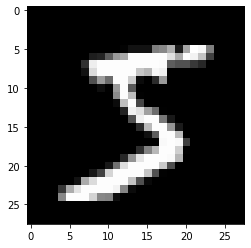

In [715]:
m_sample = mnist_data_train[0]
m_image, m_label = m_sample
plt.imshow(m_image.squeeze(), cmap = "gray")
print("label:", m_label)

In [716]:
with torch.no_grad():
    m_pred = model(m_image.unsqueeze(dim=0))

m_pred_soft = F.softmax(m_pred, dim=1)

In [717]:
m_pred.shape

torch.Size([1, 10])

In [718]:
target = range(m_pred.shape[1])

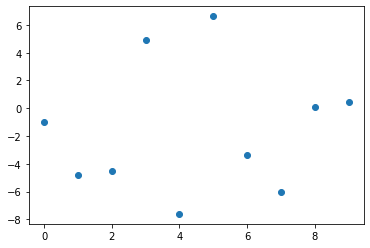

In [719]:
plt.scatter(target, m_pred)

# M example - batch

In [720]:
m_batch = next(iter(mnist_dataloader_train))
m_images, m_labels = m_batch

In [721]:
with torch.no_grad():
    m_preds = model(m_images)
    
m_preds.shape

torch.Size([100, 10])

In [722]:
m_preds.unsqueeze(dim=1).shape

torch.Size([100, 1, 10])

In [723]:
for i in m_preds.unsqueeze(dim=1):
    print("----", i.mean(dim=0))

---- tensor([ -6.9682,   1.6510,  -5.2345,   4.6834, -11.6575,   8.4623,  -6.6970,  -5.8166,   1.6222,  -3.8590])
---- tensor([16.2423, -7.9127, -1.1379, -4.9608, -6.5986,  0.4337, -0.4945, -1.6856, -2.9715, -2.0165])
---- tensor([-4.7286, -6.3068, -4.0881, -3.4906,  7.9027, -3.8654, -3.7006, -3.7770, -2.3811,  4.0727])
---- tensor([-3.4264, 16.4649, -2.8169, -6.4939,  0.9396, -6.4625, -5.7220,  3.6487, -1.4942, -4.0065])
---- tensor([ -9.7607,  -2.5324,  -7.9904,  -3.0905,   3.5457,  -4.2681, -12.3725,  -0.5864,  -0.5771,   9.3031])
---- tensor([ -6.1118,  -2.1792,  10.4116,   1.6320,  -4.7684,  -4.6466, -11.1433,   5.5103,   0.7697,  -6.7954])
---- tensor([-1.8859,  7.0225,  0.7615, -2.7403, -0.2477, -3.4252, -2.3601, -1.0161, -1.1359, -1.2497])
---- tensor([-15.3417,  -0.9291,  -5.5682,  19.3813, -13.8862,   5.6931, -23.3286,  -8.4215,  -1.9996,  -3.0211])
---- tensor([-2.9191, 14.7095, -2.3834, -6.1911, -0.5001, -3.9447, -2.9243, -0.3256, -1.8457, -1.8686])
---- tensor([-7.6605,  0

# M example - sample - MC dropout

In [724]:
with torch.no_grad():
    m_pred_list = []
    for i in range(10):
        m_pred = model(m_image.unsqueeze(dim=0))
        m_pred_list.append(m_pred.unsqueeze(dim=0))

m_preds = torch.cat(m_pred_list)
# m_pred_soft = F.softmax(m_pred, dim=1)

In [725]:
m_preds.shape

torch.Size([10, 1, 10])

In [726]:
with torch.no_grad():
    m_pred_list = []
    for i in range(10):
        m_pred = model(m_image.unsqueeze(dim=0))
        m_pred_list.append(m_pred)

m_preds = torch.cat(m_pred_list)
# m_pred_soft = F.softmax(m_pred, dim=1)

In [727]:
m_preds.shape

torch.Size([10, 10])

In [728]:
target_10_list = [[0,1,2,3,4,5,6,7,8,9]]*10
target_10 = torch.tensor(target_10_list)
target_10.shape

torch.Size([10, 10])

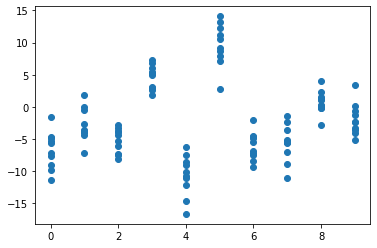

In [729]:
plt.scatter(target_10, m_preds)

In [730]:
m_preds.mean(dim=0)

tensor([ -6.7270,  -2.8123,  -5.2214,   4.6316, -10.6494,   9.7072,  -6.0985,  -5.5904,   0.7434,  -1.9066])

In [731]:
m_preds.std(dim=0)

tensor([2.8941, 2.5660, 1.9165, 1.8753, 3.1825, 3.3183, 2.1664, 2.8949, 1.8168, 2.4651])

In [732]:
test = torch.cat([m_preds, m_preds], dim=1)
test.shape

torch.Size([10, 20])

# M example - batch - MC dropout

EMNIST

In [752]:
m_batch = next(iter(mnist_dataloader_train))
m_images, m_labels = m_batch

### MC

In [753]:
with torch.no_grad():
    pred = model(m_image.unsqueeze(dim=1))
    m_pred = F.softmax(pred, dim=1)

In [754]:
n = 100
mc_drop_list = []

with torch.no_grad():
    for mc in range(n):
#         print("mc")
        m_preds = F.softmax(model(m_images).unsqueeze(dim=1), dim=2)
        mc_drop_list.append(m_preds)

In [755]:
print(len(mc_drop_list))
mc_drop_list[0].shape

100


torch.Size([100, 1, 10])

In [756]:
mc_drop = torch.cat(mc_drop_list, dim=1)

In [757]:
# mc_drop.mean(dim=0)

In [758]:
mc_drop[0][0].sum()

tensor(1.0000)

In [759]:
targets = [list(target)]*n

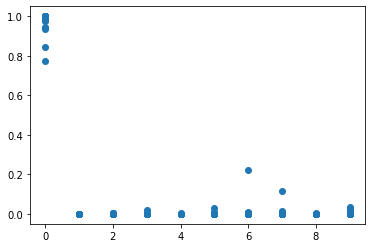

In [760]:
plt.scatter(targets, mc_drop[1])

In [761]:
mc_drop[0].numel()

1000

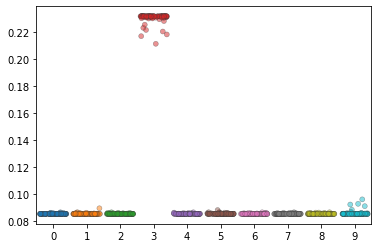

In [781]:
img = 10
numell = F.softmax(mc_drop[img], dim=1).reshape(mc_drop[img].numel())
sns.stripplot(list(target)*n, numell, jitter=0.4, alpha=0.5, linewidth=0.5)

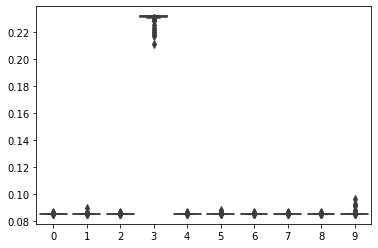

In [782]:
sns.boxplot(list(target)*n, numell)

In [683]:
means = mc_drop[1].mean(dim=0)

In [684]:
# sns.stripplot(target, numell, jitter = 0.4)?

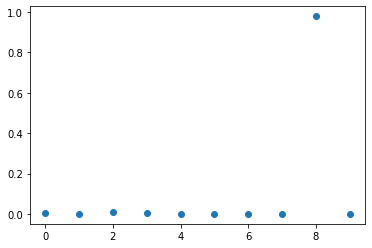

In [698]:
plt.scatter(target, m_pred_soft)

In [686]:
n = 100
mc_drop_list = []

with torch.no_grad():
    for mc in range(n):
#         print("mc")
        m_preds = model(m_images).unsqueeze(dim=1)
        mc_drop_list.append(m_preds)

In [687]:
mc_drop = torch.cat(mc_drop_list, dim=1)

In [688]:
numell = mc_drop[1].reshape(mc_drop[1].numel())

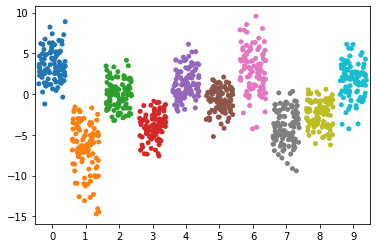

In [689]:
sns.stripplot(list(target)*n, numell, jitter = 0.4)

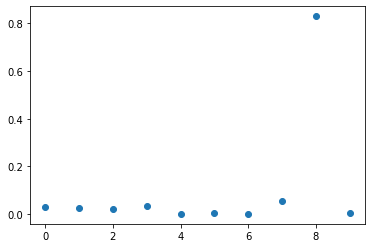

In [697]:
plt.scatter(target, m_pred)

EVEN OPNIEUW